In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from scipy.interpolate import interp1d

In [ ]:
#zakres dla wszystkich funkcji
x_min = -np.pi
x_max = np.pi

In [ ]:
#ilość punktów
N = 100

In [ ]:
#funkcja do interpolacji (sin(x))
def sinus_function(x):
    return np.sin(x)

In [ ]:
#funkcja do interpolacji (sin(x^(-1)))
def sinus_function2(x):
    x[x == 0] = np.finfo(float).eps  #Zabezpieczenie przed dzieleniem przez zero
    return np.sin(1 / x)

In [ ]:
#funkcja do interpolacji (sgn(sin(8x))
def sinus_function3(x):
  return np.sign(np.sin(8 * x))

In [ ]:
#funkcja jądro konwolucji h1(x)
def h1(x):
    return (x >= 0) & (x < 1)

In [ ]:
#funkcja jądro konwolucji h2(x)
def h2(x):
    return (x >= -1/2) & (x < 1/2)

In [ ]:
#funkcja jądro konwolucji h3(x)
def h3(x):
    return np.where(x == 0, 1, np.sin(x) / x)

In [ ]:
#przedział funkcji sinus
x = np.linspace(x_min, x_max, N)
y = sinus_function(x)

Text(0.5, 1.0, 'Oryginalna funkcja sin(x) o 100 punktach')

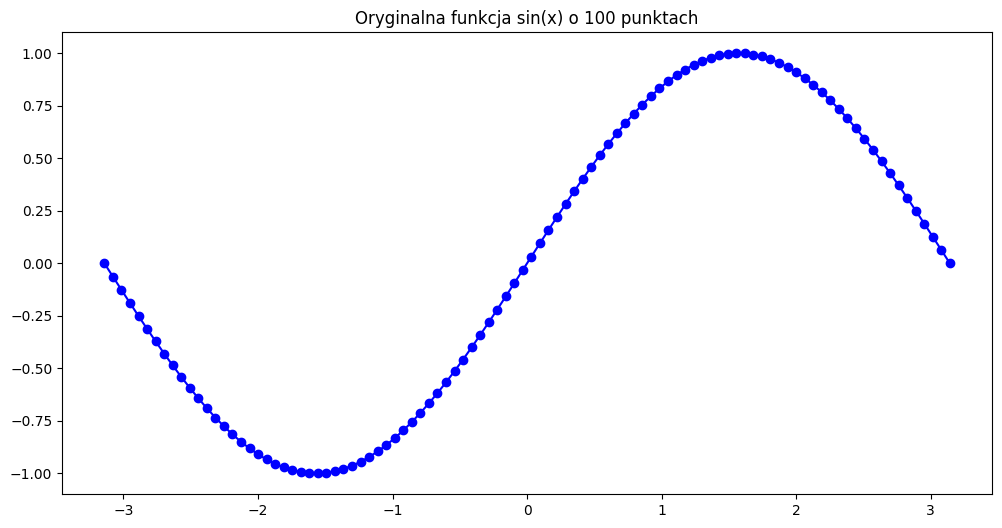

In [ ]:
#oryginalna funkcja sin(x))
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'bo-')
plt.title(f'Oryginalna funkcja sin(x) o {N} punktach')

In [ ]:
#interpolacja funkcji sin(x)
def interp_func(new_N, _color, size):
  x_new = np.linspace(x_min, x_max, new_N)
  interp = interp1d(x, y, kind='cubic')
  y_new = interp(x_new)
  plt.scatter(x_new, y_new, color=f'{_color}', s=size, label=f'{new_N} punktów')
  plt.plot(x,y)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Interpolacja funkcji sinus o {new_N} punktach')
  plt.grid(True)
  plt.show()

In [ ]:
interp_func(N, _color='red', size=20)
interp_func(N*2, _color='blue', size=15)
interp_func(N*4, _color='green', size=10)
interp_func(N*10, _color='yellow', size=5)

In [ ]:
#interpolacja funkcji sin(x) za pomocą jądra konwolucji danego w argumencie
def convoluted_func(x_min, x_max, new_N, func):
  x_new = np.linspace(x_min, x_max, new_N)
  kernel = func(x_new)
  y_new = np.convolve(y, kernel, mode='same') / np.sum(kernel)

  plt.figure(figsize=(12, 6))
  plt.plot(x, y, 'bo-', label='Oryginalna funkcja')
  plt.plot(x_new, y_new, 'r-', label=f'{new_N} punktów (konwolucja)')

  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Interpolacja funkcji sin(x) za pomocą konwolucji')
  plt.grid(True)
  plt.show()

In [ ]:
#funkcja sin(x) dla jądra h1
convoluted_func(x_min, x_max, N, h1)
convoluted_func(x_min, x_max, N*2, h1)
convoluted_func(x_min, x_max, N*4, h1)
convoluted_func(x_min, x_max, N*10, h1)

In [ ]:
#funkcja sin(x) dla jądra h2
convoluted_func(x_min, x_max, N, h2)
convoluted_func(x_min, x_max, N*2, h2)
convoluted_func(x_min, x_max, N*4, h2)
convoluted_func(x_min, x_max, N*10, h2)

In [ ]:
#funkcja sin(x) dla jądra h3
convoluted_func(x_min, x_max, N, h3)
convoluted_func(x_min, x_max, N*2, h3)
convoluted_func(x_min, x_max, N*4, h3)
convoluted_func(x_min, x_max, N*10, h3)

In [ ]:
# Obliczanie MSE funkcji sin(x) dla jądra danego w argumencie
def Mse(x_min, x_max, new_N, func):
  x_new = np.linspace(x_min, x_max, new_N)
  kernel = func(x_new)
  y_new = np.convolve(y, kernel, mode='same') / np.sum(kernel)
  y_new = y_new[:len(y)]
  mse = np.mean((y - y_new) ** 2)
  return round(mse, 3)

In [ ]:
# Dla jądra h1
print(Mse(x_min, x_max, N, h1))
print(Mse(x_min, x_max, N*2, h1))
print(Mse(x_min, x_max, N*4, h1))
print(Mse(x_min, x_max, N*10, h1))

0.117
0.931
0.495
0.495


In [ ]:
# Dla jądra h2
print(Mse(x_min, x_max, N, h2))
print(Mse(x_min, x_max, N*2, h2))
print(Mse(x_min, x_max, N*4, h2))
print(Mse(x_min, x_max, N*10, h2))

0.002
1.094
0.495
0.495


In [ ]:
# Dla jądra h3
print(Mse(x_min, x_max, N, h3))
print(Mse(x_min, x_max, N*2, h3))
print(Mse(x_min, x_max, N*4, h3))
print(Mse(x_min, x_max, N*10, h3))

0.146
0.477
0.502
0.496


In [ ]:
#przedział funkcji sin(x^(-1))
x2 = np.linspace(x_min, x_max, N)
y2 = sinus_function2(x)

In [ ]:
#wykres funkcji sin(x^(-1))
plt.figure(figsize=(10, 6))
plt.plot(x2, y2, color='blue')
plt.title('Wykres funkcji sin(x^(-1))')

In [ ]:
#interpolacja funkcji sin(x^(-1))
def interp_func2(new_N, _color, size):
  x_new = np.linspace(x_min, x_max, new_N)
  interp = interp1d(x2, y2, kind='cubic')
  y_new = interp(x_new)
  plt.scatter(x_new, y_new, color=f'{_color}', s=size, label=f'{new_N} punktów')
  plt.plot(x2,y2)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Interpolacja funkcji o {new_N} punktach')
  plt.grid(True)
  plt.show()

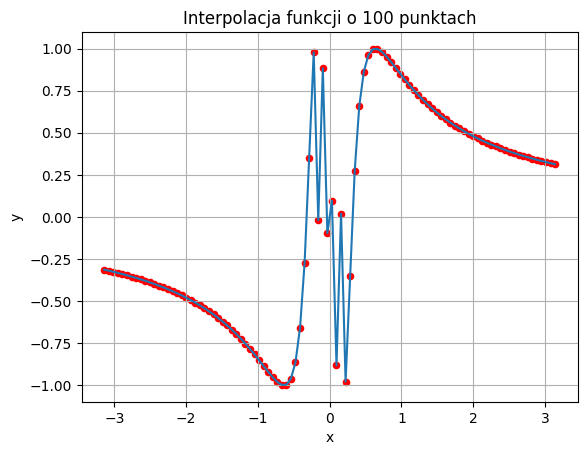

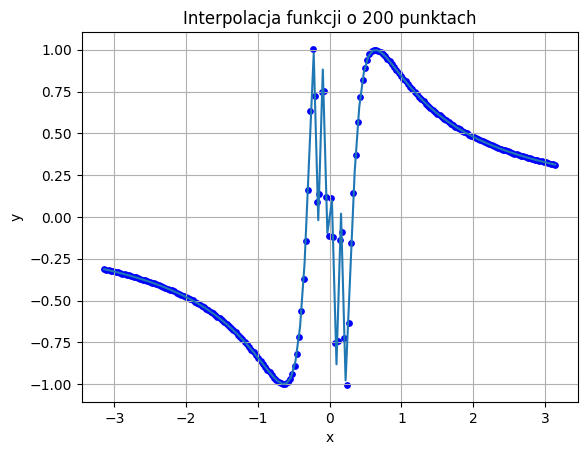

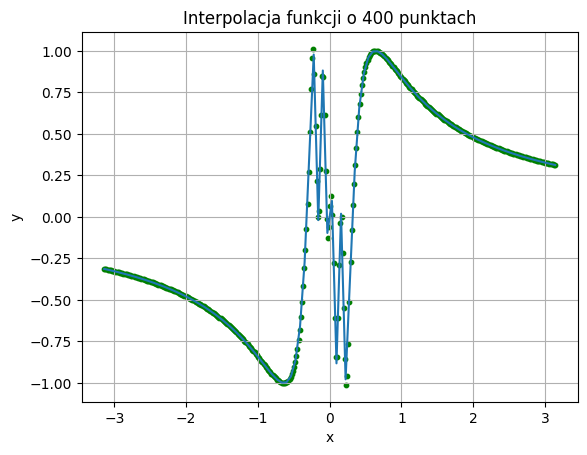

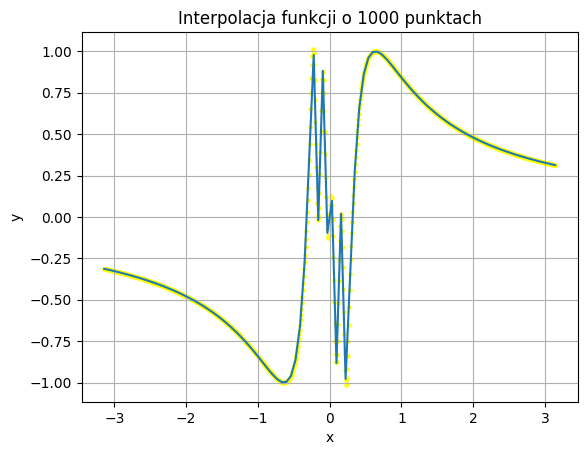

In [ ]:
interp_func2(N, _color='red', size=20)
interp_func2(N*2, _color='blue', size=15)
interp_func2(N*4, _color='green', size=10)
interp_func2(N*10, _color='yellow', size=5)

In [ ]:
#interpolacja funkcji sin(x^-1) za pomocą jądra konwolucji podanego w argumencie
def convoluted_funct2(x_min, x_max, new_N, func):
  x_new = np.linspace(x_min, x_max, new_N)
  kernel = func(x_new)
  y_new = np.convolve(y2, kernel, mode='same') / np.sum(kernel)

  plt.figure(figsize=(12, 6))
  plt.plot(x2, y2, 'bo-', label='Oryginalna funkcja')
  plt.plot(x_new, y_new, 'r-', label=f'{new_N} punktów (konwolucja)')

  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Interpolacja funkcji sin(x^-1) za pomocą konwolucji')
  plt.grid(True)
  plt.show()

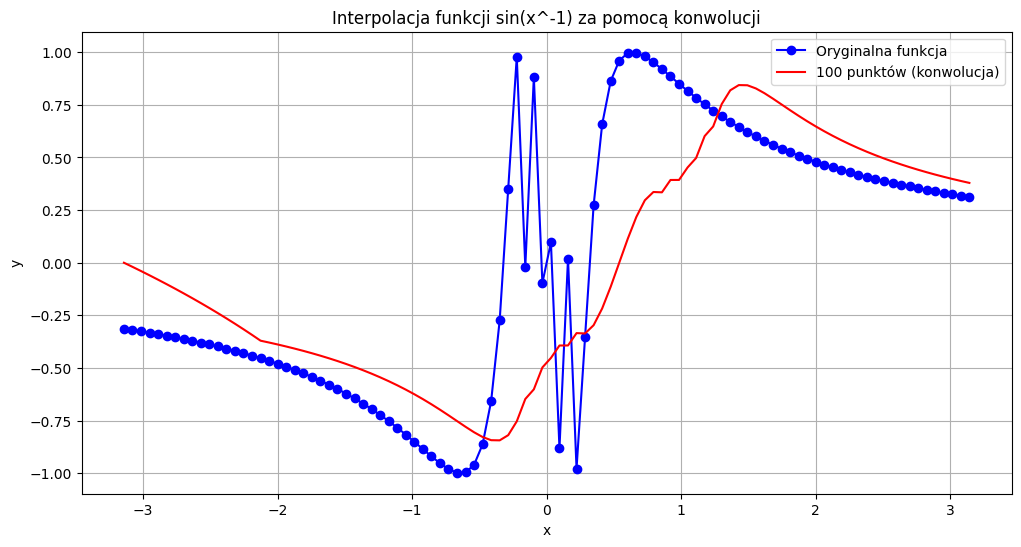

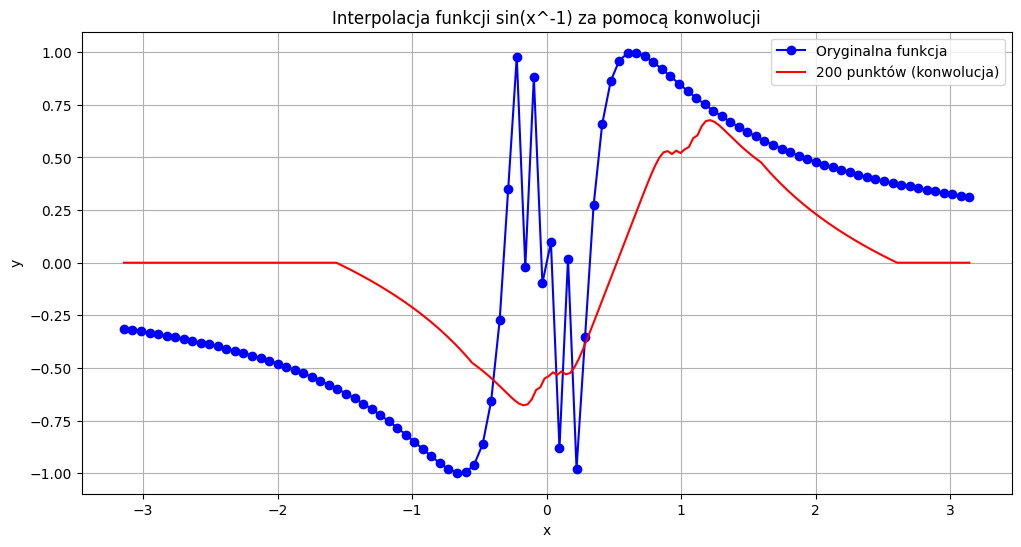

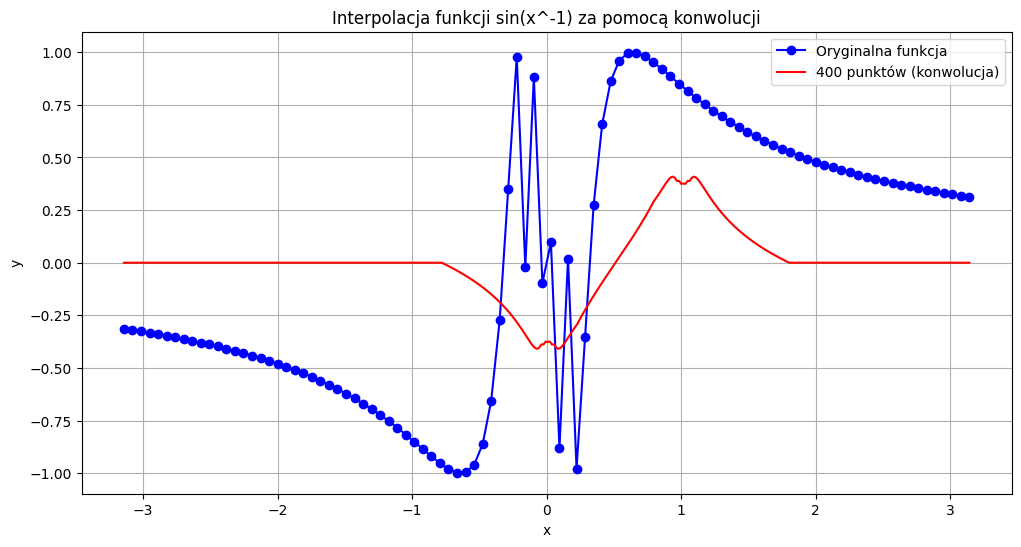

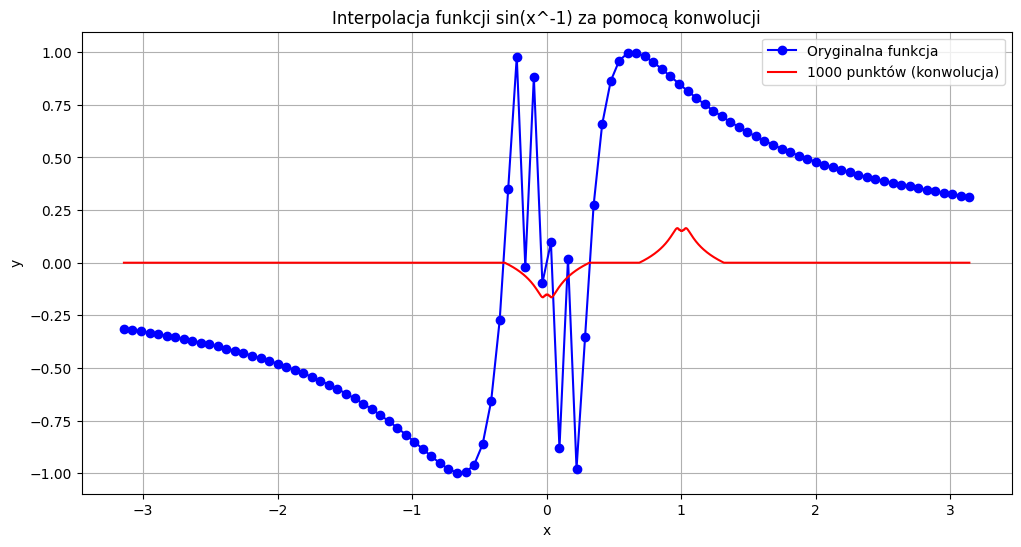

In [ ]:
# Dla jądra h1
convoluted_funct2(x_min, x_max, N, h1)
convoluted_funct2(x_min, x_max, N*2, h1)
convoluted_funct2(x_min, x_max, N*4, h1)
convoluted_funct2(x_min, x_max, N*10, h1)

In [ ]:
# Dla jądra h2
convoluted_funct2(x_min, x_max, N, h2)
convoluted_funct2(x_min, x_max, N*2, h2)
convoluted_funct2(x_min, x_max, N*4, h2)
convoluted_funct2(x_min, x_max, N*10, h2)

In [ ]:
# Dla jądra h3
convoluted_funct2(x_min, x_max, N, h3)
convoluted_funct2(x_min, x_max, N*2, h3)
convoluted_funct2(x_min, x_max, N*4, h3)
convoluted_funct2(x_min, x_max, N*10, h3)

In [ ]:
# Obliczanie MSE funkcji sin(x^-1) dla jądra danego w argumencie
def Mse2(x_min, x_max, new_N, func):
  x_new = np.linspace(x_min, x_max, new_N)
  kernel = func(x_new)
  y_new = np.convolve(y2, kernel, mode='same') / np.sum(kernel)
  y_new = y_new[:len(y2)]
  mse2 = np.mean((y2 - y_new) ** 2)
  return round(mse2, 3)

In [ ]:
# Dla jądra h1
print(Mse2(x_min, x_max, N, h1))
print(Mse2(x_min, x_max, N*2, h1))
print(Mse2(x_min, x_max, N*4, h1))
print(Mse2(x_min, x_max, N*10, h1))

0.171
0.626
0.386
0.386


In [ ]:
# Dla jądra h2
print(Mse2(x_min, x_max, N, h2))
print(Mse2(x_min, x_max, N*2, h2))
print(Mse2(x_min, x_max, N*4, h2))
print(Mse2(x_min, x_max, N*10, h2))

0.087
0.721
0.386
0.386


In [ ]:
# Dla jądra h3
print(Mse2(x_min, x_max, N, h3))
print(Mse2(x_min, x_max, N*2, h3))
print(Mse2(x_min, x_max, N*4, h3))
print(Mse2(x_min, x_max, N*10, h3))

0.185
0.375
0.39
0.387


In [ ]:
#przedział dla funkcji sgn(sin(8x))
x3 = np.linspace(x_min, x_max, N)
y3 = sinus_function3(x)

Text(0.5, 1.0, 'Oryginalna funkcja sgn(sin(8x))')

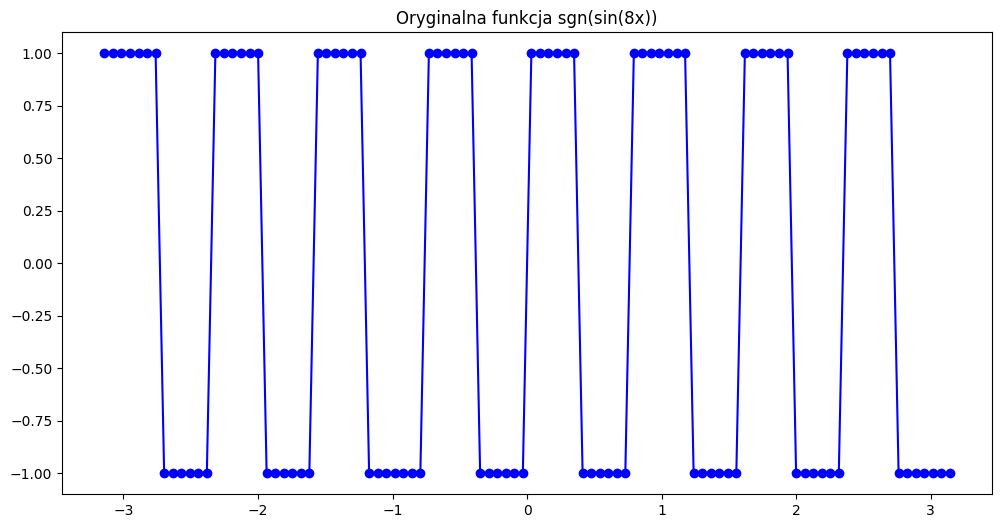

In [ ]:
#oryginalna funkcja sgn(sin(8x))
plt.figure(figsize=(12, 6))
plt.plot(x3, y3, 'bo-')
plt.title('Oryginalna funkcja sgn(sin(8x))')

In [ ]:
#interpolacja funkcji sgn(sin(8x))
def interp_func3(new_N, _color, size):
  x_new = np.linspace(x_min, x_max, new_N)
  interp = interp1d(x3, y3, kind='cubic')
  y_new = interp(x_new)
  plt.scatter(x_new, y_new, color=f'{_color}', s=size, label=f'{new_N} punktów')
  plt.plot(x3,y3)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Interpolacja funkcji o {new_N} punktach')
  plt.grid(True)
  plt.show()

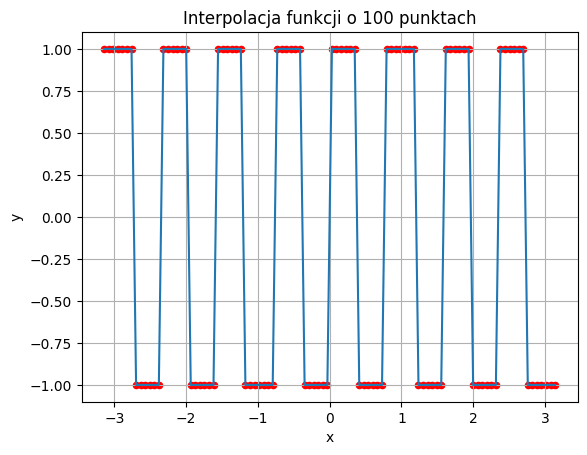

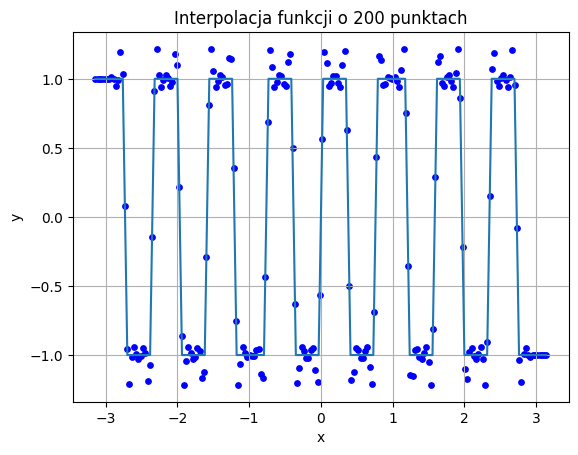

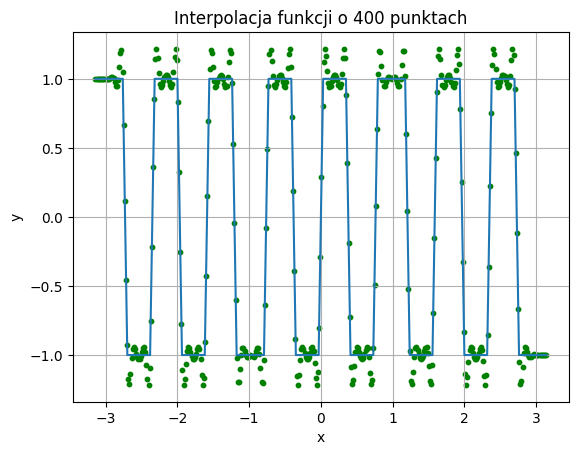

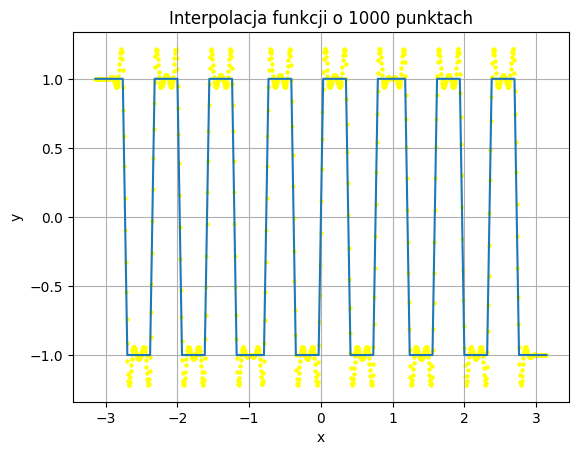

In [ ]:
interp_func3(N, _color='red', size=20)
interp_func3(N*2, _color='blue', size=15)
interp_func3(N*4, _color='green', size=10)
interp_func3(N*10, _color='yellow', size=5)

In [ ]:
#interpolacja funkcji sgn(sin(8x)) za pomocą jądra konwolucji podanego w argumencie
def convoluted_funct3(x_min, x_max, new_N, func):
  x_new = np.linspace(x_min, x_max, new_N)
  kernel = func(x_new)
  y_new = np.convolve(y3, kernel, mode='same') / np.sum(kernel)

  plt.figure(figsize=(12, 6))
  plt.plot(x3, y3, 'bo-', label='Oryginalna funkcja')
  plt.plot(x_new, y_new, 'r-', label=f'{new_N} punktów (konwolucja)')

  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Interpolacja funkcji sgn(sin(8x)) za pomocą konwolucji')
  plt.grid(True)
  plt.show()

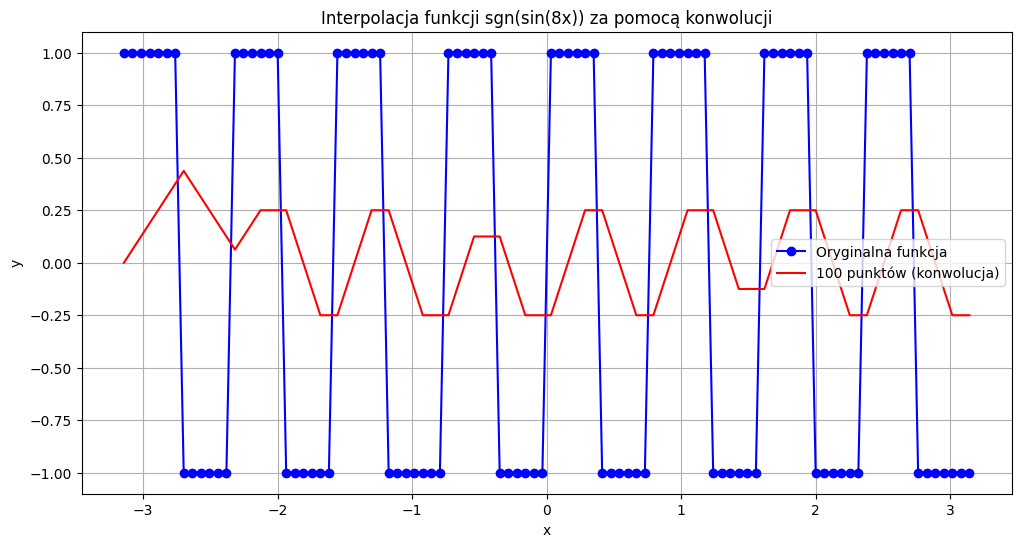

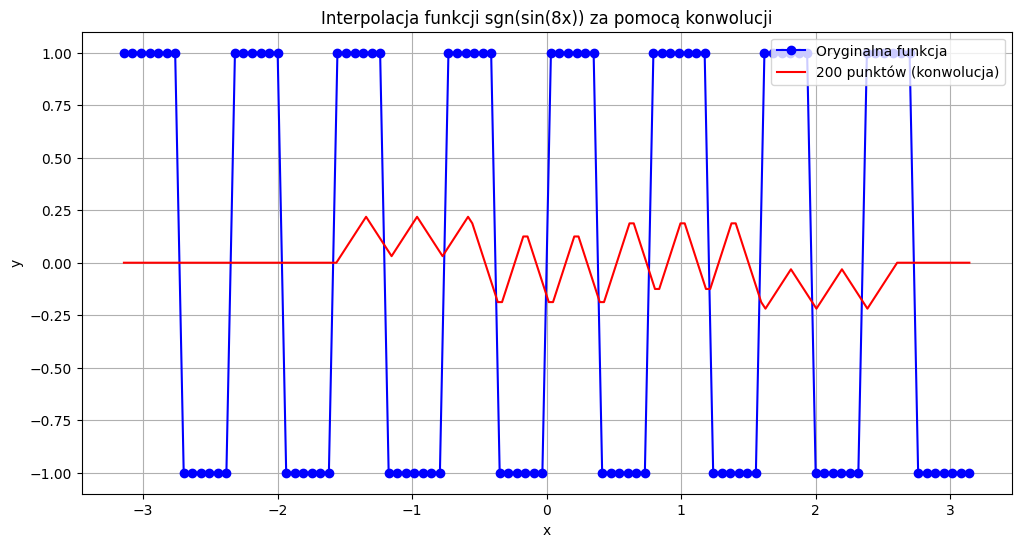

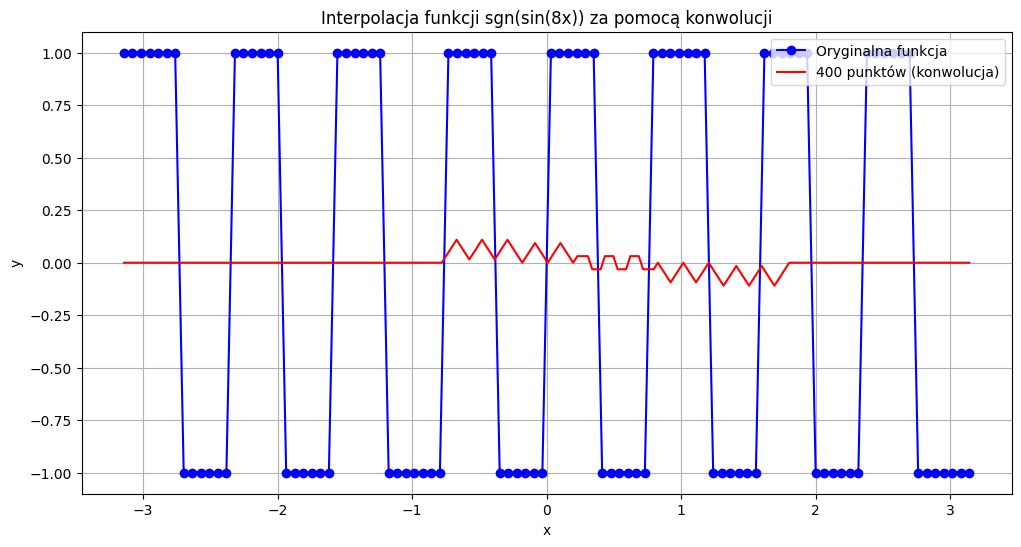

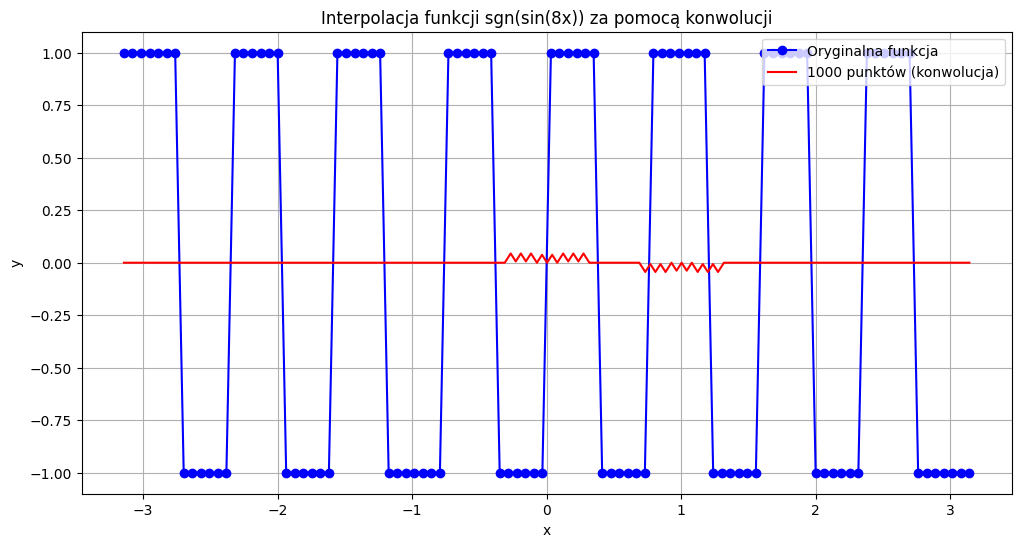

In [ ]:
# Dla jądra h1
convoluted_funct3(x_min, x_max, N, h1)
convoluted_funct3(x_min, x_max, N*2, h1)
convoluted_funct3(x_min, x_max, N*4, h1)
convoluted_funct3(x_min, x_max, N*10, h1)

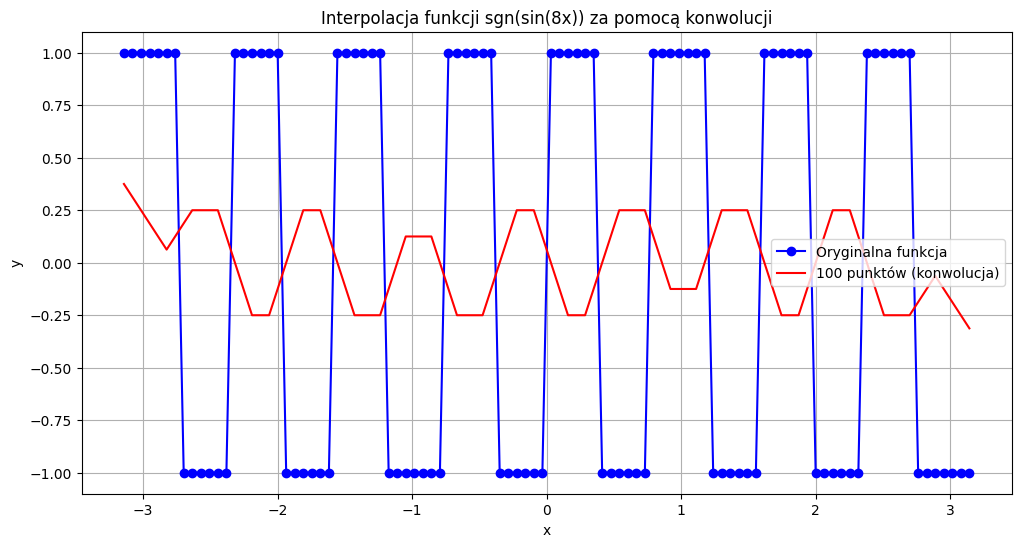

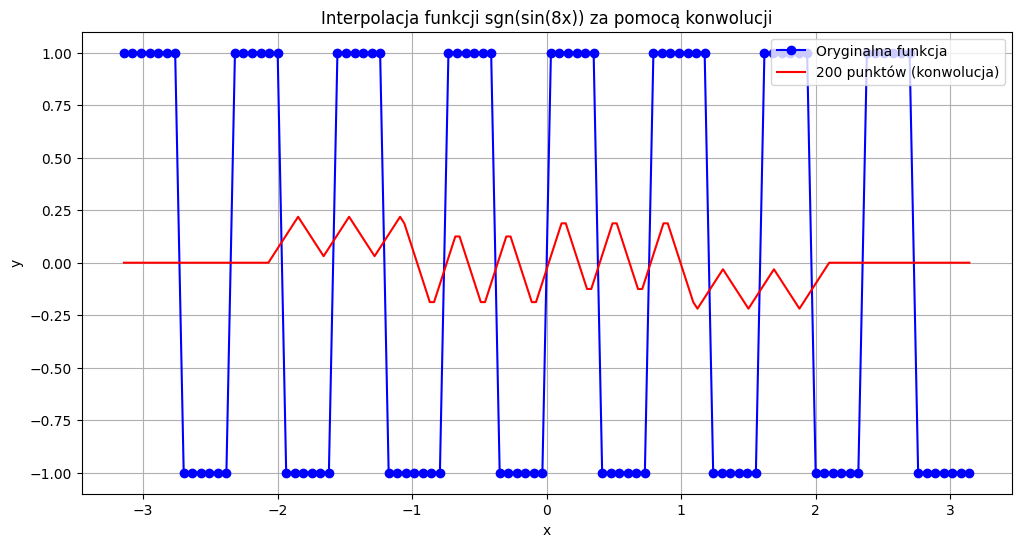

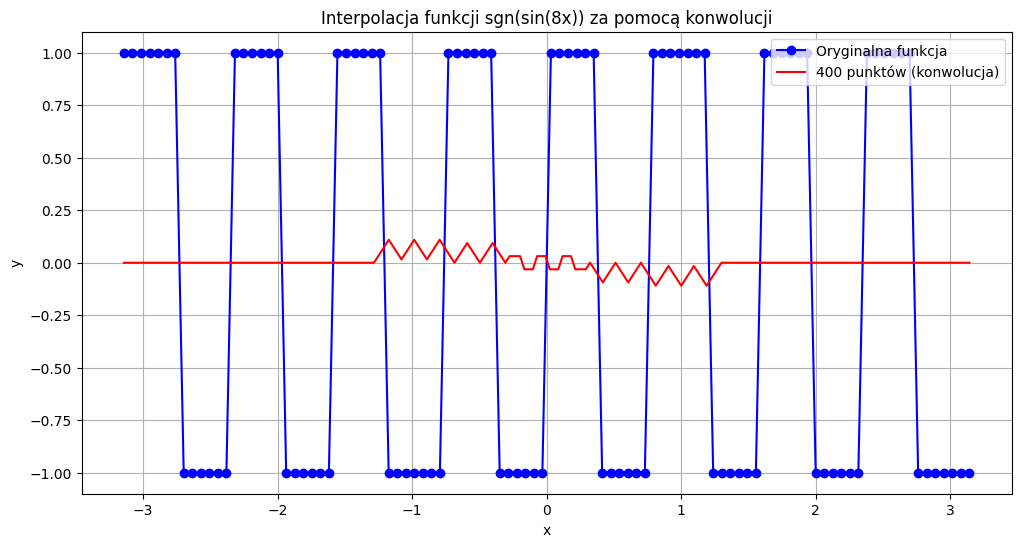

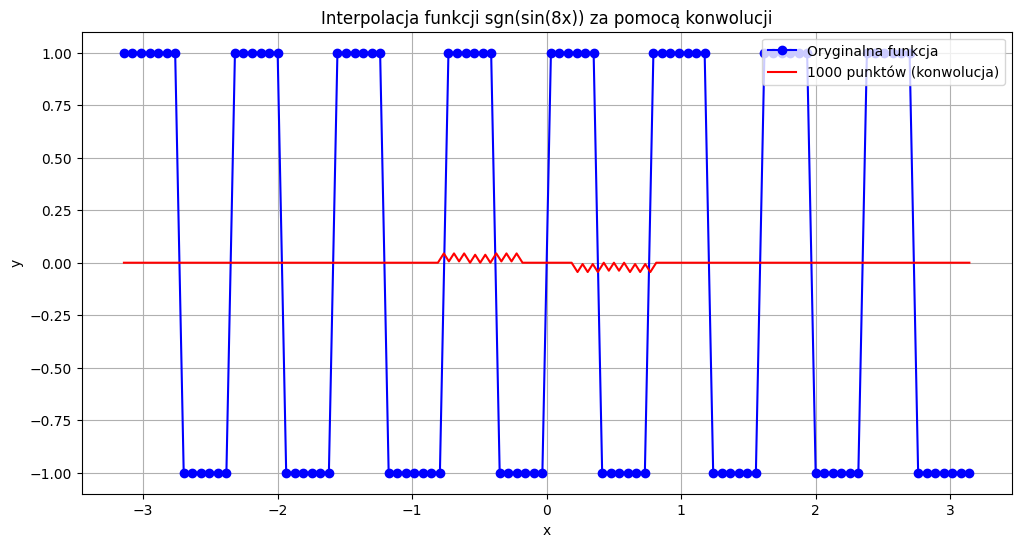

In [ ]:
# Dla jądra h2
convoluted_funct3(x_min, x_max, N, h2)
convoluted_funct3(x_min, x_max, N*2, h2)
convoluted_funct3(x_min, x_max, N*4, h2)
convoluted_funct3(x_min, x_max, N*10, h2)

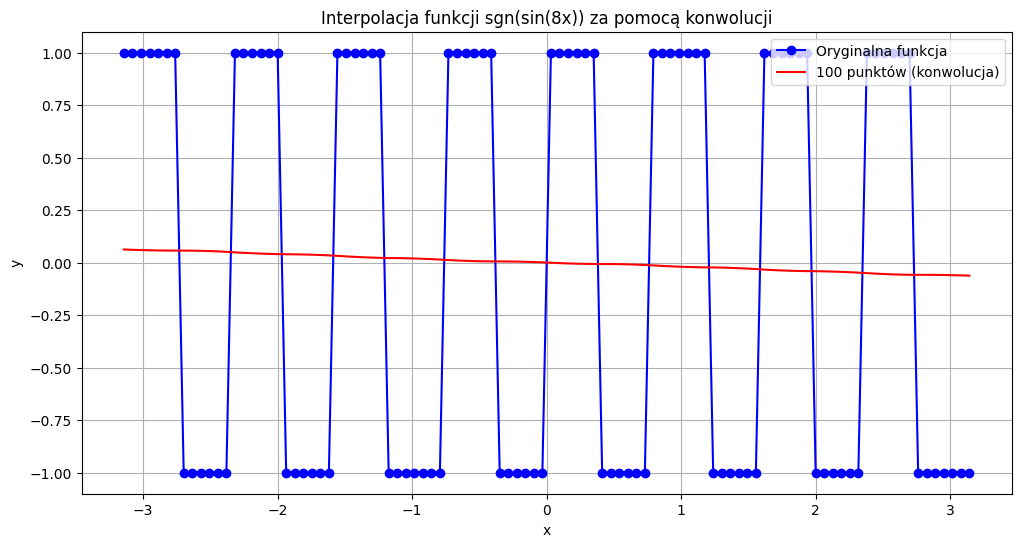

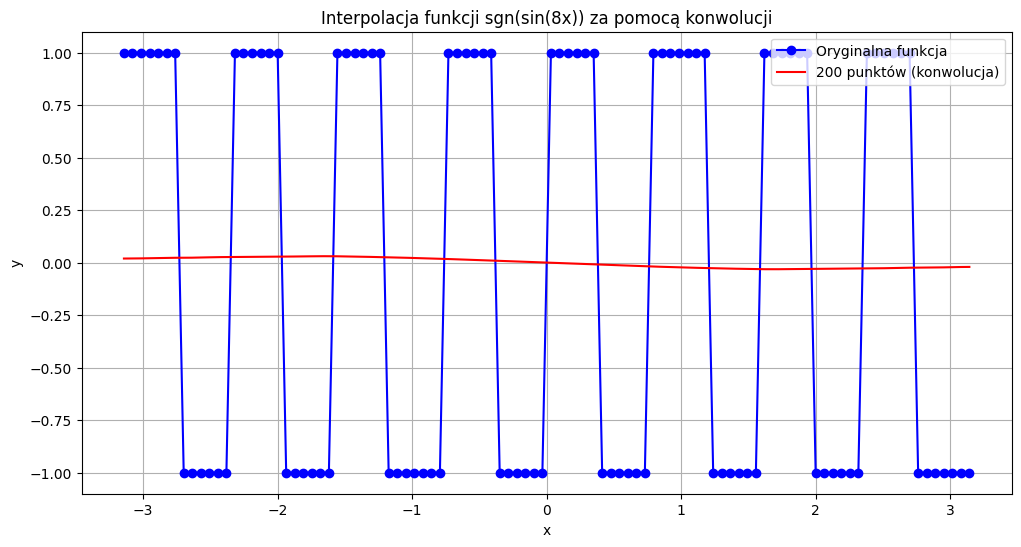

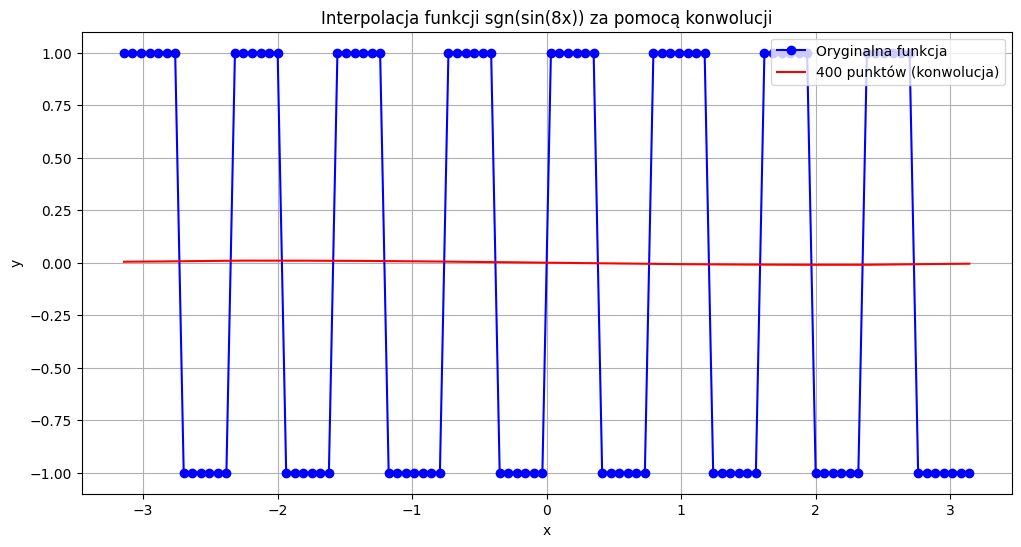

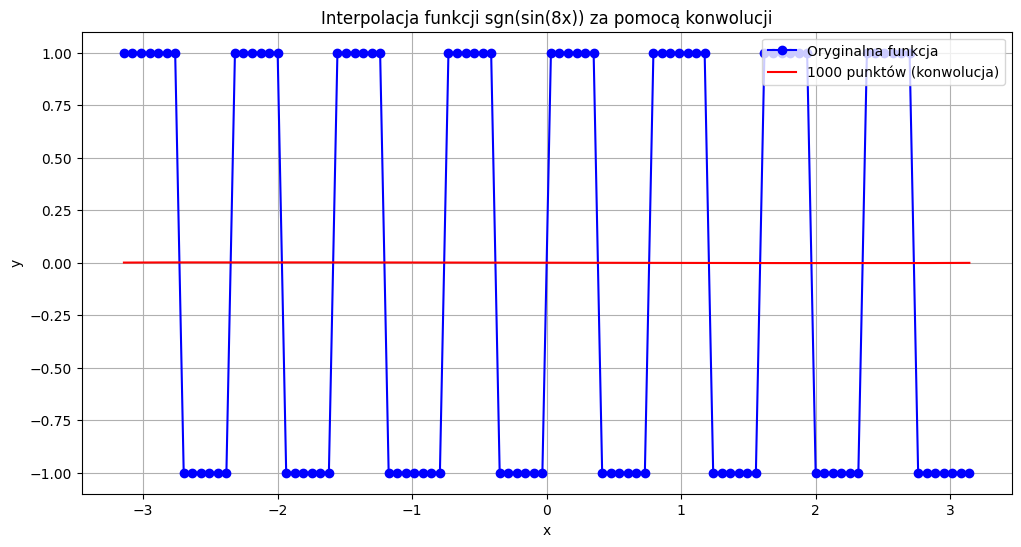

In [ ]:
# Dla jądra h3
convoluted_funct3(x_min, x_max, N, h3)
convoluted_funct3(x_min, x_max, N*2, h3)
convoluted_funct3(x_min, x_max, N*4, h3)
convoluted_funct3(x_min, x_max, N*10, h3)

In [ ]:
# Obliczanie MSE funkcji sgn(sin(8x)) dla jądra danego w argumencie
def Mse3(x_min, x_max, new_N, func):
  x_new = np.linspace(x_min, x_max, new_N)
  kernel = func(x_new)
  y_new = np.convolve(y3, kernel, mode='same') / np.sum(kernel)
  y_new = y_new[:len(y3)]
  mse3 = np.mean((y3 - y_new) ** 2)
  return round(mse3, 3)

In [ ]:
# Dla jądra h1
print(Mse3(x_min, x_max, N, h1))
print(Mse3(x_min, x_max, N*2, h1))
print(Mse3(x_min, x_max, N*4, h1))
print(Mse3(x_min, x_max, N*10, h1))

0.935
1.036
1.0
1.0


In [ ]:
# Dla jądra h2
print(Mse3(x_min, x_max, N, h2))
print(Mse3(x_min, x_max, N*2, h2))
print(Mse3(x_min, x_max, N*4, h2))
print(Mse3(x_min, x_max, N*10, h2))

1.263
0.915
1.0
1.0


In [ ]:
# Dla jądra h3
print(Mse3(x_min, x_max, N, h3))
print(Mse3(x_min, x_max, N*2, h3))
print(Mse3(x_min, x_max, N*4, h3))
print(Mse3(x_min, x_max, N*10, h3))

0.994
0.999
1.0
1.0
